In [61]:
import os
os.chdir('G:/My Drive/GitHub/VideoDiffusion/')
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We choose to train only "cat" classes in CIFAR10

1. Dataset preparation

Files already downloaded and verified


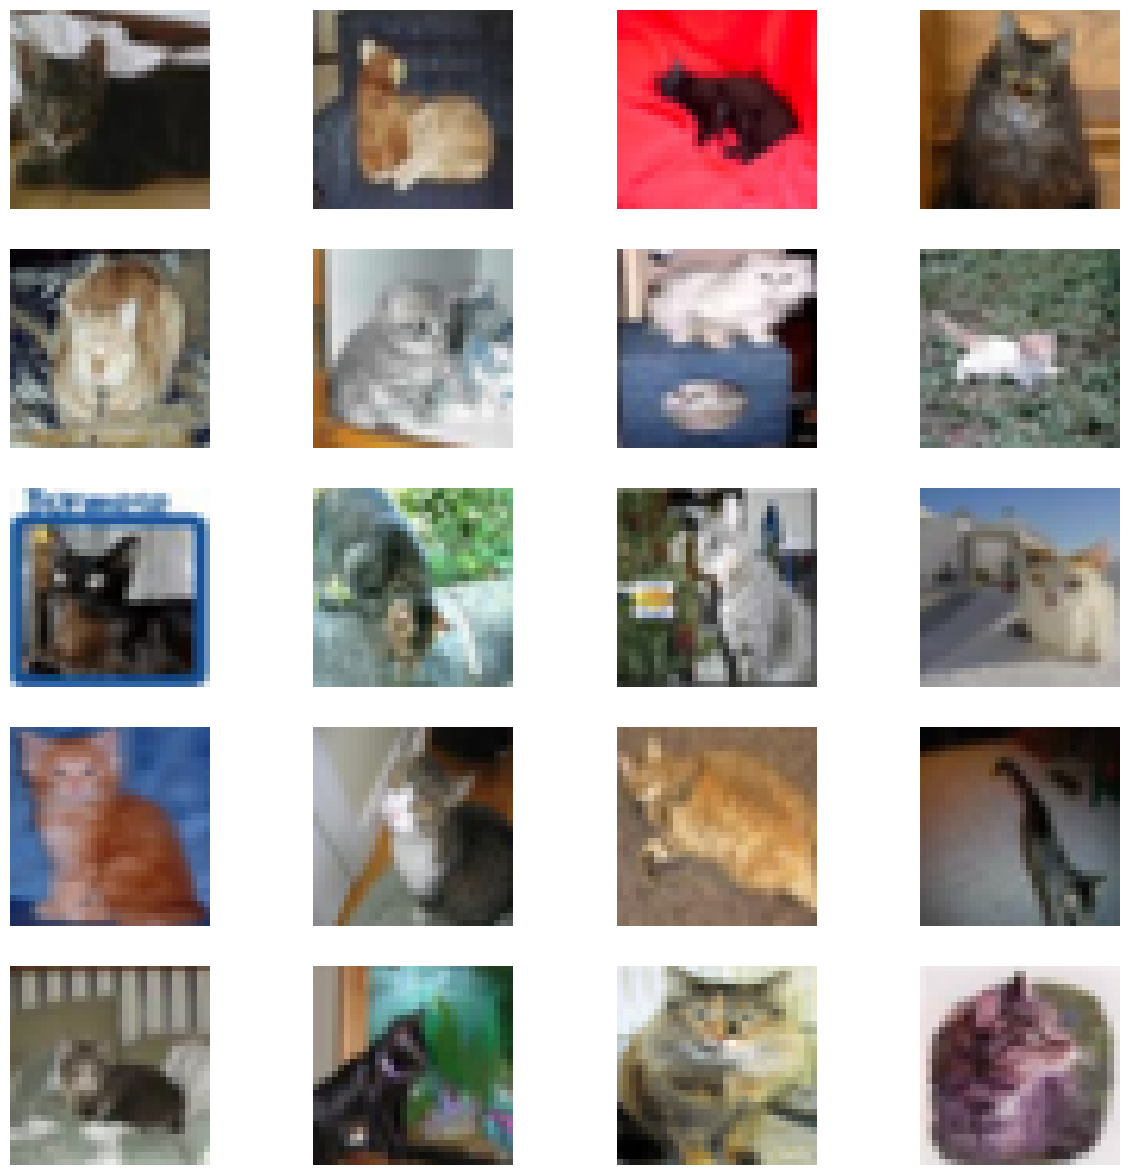

In [53]:
# Load CIFAR10 dataset
transform = transforms.Compose([
    transforms.ToTensor(), 
])
all_dataset = torchvision.datasets.CIFAR10(root='./CIFAR', train=True, download=True, transform=transform)

# Get the cat class, and set the correct tensor format
classes = all_dataset.classes
cat_class_index = classes.index('cat')
cat_dataset_pre = [(img, label) for img, label in all_dataset if label == cat_class_index]
cat_dataset = [item[0].permute(1,2,0) for item in cat_dataset_pre]

# Example image plot
def img_plt(imgset, num_samples=20, cols=4):
    plt.figure(figsize=(15, 15))
    for i, img in enumerate(imgset):
        if i == num_samples:
            break
        plt.subplot(num_samples // cols, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
img_plt(cat_dataset)

In [60]:
torch.min(cat_dataset[0])

tensor(0.0431)

2. Data loader

In [65]:
from torch.utils.data import DataLoader
from torchvision import transforms

batch_size = 100

def load_transform_data():
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), 
        transforms.Lambda(lambda x: x*2-1 )
    ])
    
    train_set = torchvision.datasets.CIFAR10(root='./CIFAR_train', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.CIFAR10(root='./CIFAR_test', train=False, download=True, transform=data_transform)
    total_set = torch.utils.data.ConcatDataset([train_set, test_set])
    return total_set
# since this is a generative AI model, we don't need to split the dataset into train and test

def show_sample_image(image):
    image_transform = transforms.Compose([
        transforms.Lambda(lambda x: (x+1)/2 ),
        transforms.Lambda(lambda x: x.permute(1,2,0) ),
        transforms.Lambda(lambda x: x*255 ),
        transforms.Lambda(lambda x: x.numpy().astype(np.uint8) ),
        transforms.ToPILImage()
    ])
    

TypeError: unsupported operand type(s) for -: 'list' and 'int'